Window_Analysis_Edge_ver2.0

In [697]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [698]:
Behav = pd.read_csv('/Users/xinyuyangren/Documents/TU:e_Year2/Thesis/Aramis_Data_Warehouse/Behavior_Study/1000_Behav.csv')
Behav = Behav.dropna()

#for 5,8,7,9 to rename br1 to br3

#Behav.rename(columns={'t_br1':'t_br3','rh_br1':'rh_br3','co2_br1':'co2_br3','con_br1':'con_br3','wc_br1':'wc_br3'}, inplace=True)

In [699]:
# Remap string t and f to 1 and 0, for the consequent classifying

def w_remap(x):
    if x == 't':
        x = 1
    else:
        x = 0
    return x

for col in ['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic']:
    w = Behav[col].apply(w_remap)
    Behav[col] = w

In [700]:
#generate month/hour attribute from datetime string
Behav.dt = pd.to_datetime(Behav.dt)
t = pd.DatetimeIndex(Behav.dt)
hr = t.hour
Behav['HourOfDay'] = hr
month = t.month
Behav['Month'] = month
dt = Behav.pop('dt')

In [701]:
#Behav = Behav.drop(['con_lr','con_br3','con_br2'],axis = 1)
Behav.describe()

,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,rh_br2,...,wc_kitchen,wc_br3,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,HourOfDay,Month
count,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.00000,191095.000000,...,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000,191095.000000
mean,17.620405,37.360240,607.124383,3.784618,22.618143,46.560135,1029.472451,4.959778,23.14506,42.257392,...,0.810372,0.699427,0.903095,0.770083,1.915346,118.195531,79.094236,11.599346,11.486538,6.881384
std,7.360441,21.683884,351.071994,2.108106,1.737166,9.009886,376.879811,0.072573,2.19225,8.339722,...,0.392008,0.458508,0.295829,0.420780,1.667227,197.561623,15.514724,6.611773,6.914749,3.419892
min,4.390000,0.080000,3.900000,0.005300,4.110000,0.040000,3.000000,0.006600,4.34000,0.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-576.000000,0.000000,-90.000000,0.000000,1.000000
25%,18.050000,28.180000,559.400000,4.955400,21.420000,40.240000,720.200000,4.960300,21.46000,36.880000,...,1.000000,0.000000,1.000000,1.000000,1.000000,-3.000000,70.000000,6.900000,5.000000,4.000000
50%,20.540000,45.190000,714.900000,4.960200,22.150000,46.670000,922.100000,4.961100,22.59000,42.460000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,83.000000,11.600000,11.000000,7.000000
75%,22.350000,52.410000,830.500000,4.961400,23.540000,53.010000,1303.100000,4.961800,24.51000,47.790000,...,1.000000,1.000000,1.000000,1.000000,3.000000,169.000000,91.000000,16.200000,17.000000,10.000000
max,43.250000,74.290000,4894.100000,4.968300,43.080000,76.520000,4657.800000,4.968100,44.23000,69.890000,...,1.000000,1.000000,1.000000,1.000000,13.000000,957.000000,100.000000,34.300000,23.000000,12.000000


(0, 350000)

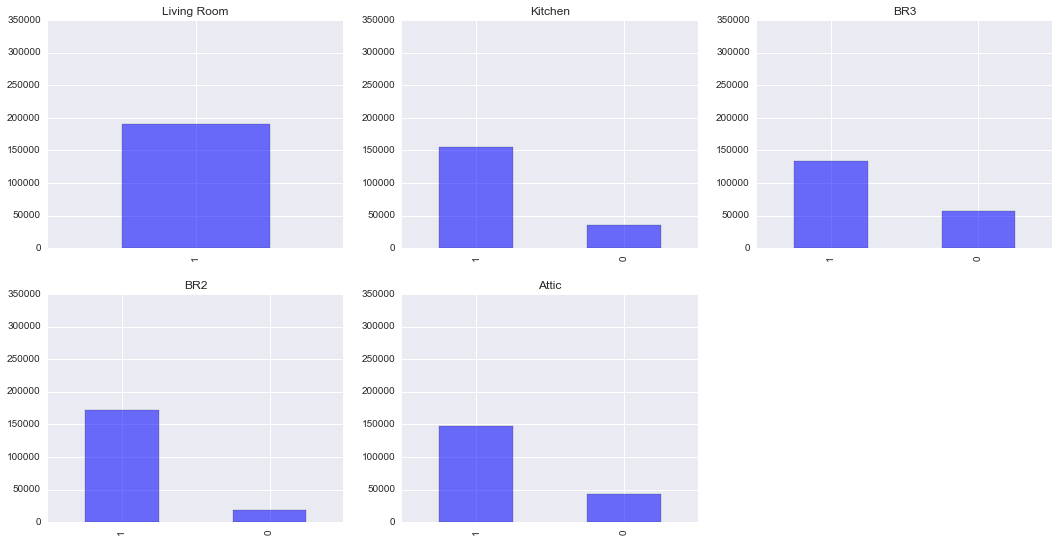

In [702]:
# some statistics
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,9), dpi=1600) 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_lr.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Living Room')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax2 = plt.subplot2grid((2,3),(0,1))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_kitchen.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Kitchen')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax3 = plt.subplot2grid((2,3),(0,2))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_br3.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('BR3')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax4 = plt.subplot2grid((2,3),(1,0))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_br2.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('BR2')
plt.ylim(0,350000)

# lets us plot many diffrent shaped graphs together 
ax5 = plt.subplot2grid((2,3),(1,1))
# plots a bar graph of those who surived vs those who did not.               
Behav.wc_attic.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title('Attic')
plt.ylim(0,350000)

In [703]:
#Deal with the cutting edges
opr = {}
opr_open = {}
opr_close = {}
counts = {}

for col in ['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic']:
    wc = Behav[col]
    opr[col] = wc-wc.shift(-1) # substract the element following 1=open 0=keep -1=close
    opr[col] = opr[col].replace(np.nan,0) # replacing the last row from nan to 0
    opr_open[col] = opr[col][opr[col] == 1].index #AWARE! The difference between no. and index
    opr_close[col] = opr[col][opr[col] == -1].index
    counts[col] = len(opr_open[col])

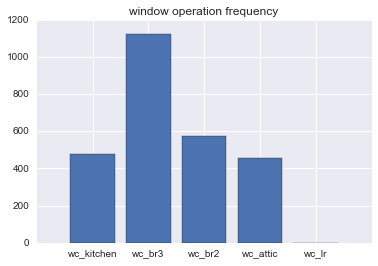

In [704]:
plt.bar(range(len(counts)), counts.values(), align='center') #from dict create bar chart
plt.xticks(range(len(counts)), counts.keys())
plt.title('window operation frequency')

{0: 3, 1: 30, 2: 45, 3: 44, 4: 37, 5: 44, 6: 42, 7: 50, 8: 73, 9: 72, 10: 79, 11: 94, 12: 173, 13: 121, 14: 66, 15: 57, 16: 44, 17: 25, 18: 11, 19: 1, 20: 2, 21: 2, 22: 4, 23: 2, 24: 0}


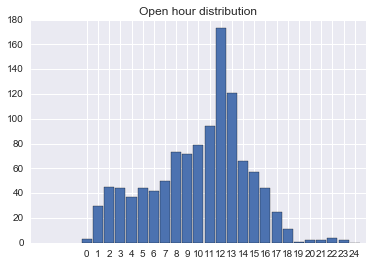

In [705]:
openidx = opr_open['wc_br3']
openhour = Behav['HourOfDay'][openidx]
index = openhour.value_counts(sort=False)[openhour.value_counts(sort=False) != np.nan].index
openhr = {}
for i in range (0,25):
    openhr[i]=0
for idx in index:
    openhr[idx] = openhour.value_counts(sort=False)[idx]
plt.bar(range(len(openhr)), openhr.values(), align='center',width = 0.9) #from dict create bar chart
plt.xticks(range(len(openhr)), openhr.keys())
plt.title('Open hour distribution')

{0: 29, 1: 33, 2: 49, 3: 39, 4: 34, 5: 43, 6: 37, 7: 42, 8: 38, 9: 33, 10: 49, 11: 15, 12: 13, 13: 45, 14: 73, 15: 97, 16: 91, 17: 87, 18: 109, 19: 25, 20: 40, 21: 68, 22: 25, 23: 7, 24: 0}


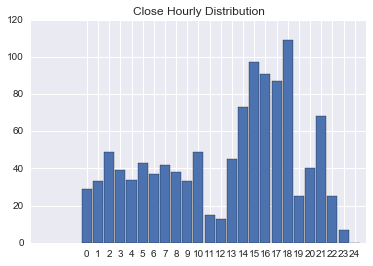

In [706]:
closeidx = opr_close['wc_br3']
closehour = Behav['HourOfDay'][closeidx]
index = closehour.value_counts(sort=False)[closehour.value_counts(sort=False) != np.nan].index
closehr = {}
for i in range (0,25):
    closehr[i]=0
for idx in index:
    closehr[idx] = closehour.value_counts(sort=False)[idx]
plt.bar(range(len(closehr)), closehr.values(), align='center',width = 0.9) #from dict create bar chart
plt.xticks(range(len(closehr)), closehr.keys())
plt.title('Close Hourly Distribution')

{0: 0, 1: 46, 2: 23, 3: 58, 4: 62, 5: 67, 6: 61, 7: 18, 8: 35, 9: 54, 10: 50, 11: 601, 12: 46}


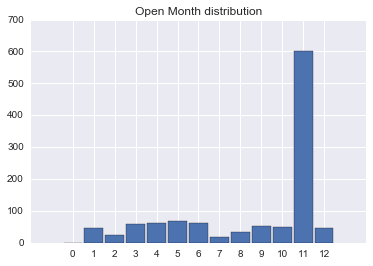

In [707]:
openmonth = Behav['Month'][openidx]
index = openmonth.value_counts(sort=False)[openmonth.value_counts(sort=False) != np.nan].index
openmon = {}
for i in range (0,13):
    openmon[i]=0
for idx in index:
    openmon[idx] = openmonth.value_counts(sort=False)[idx]
plt.bar(range(len(openmon)), openmon.values(), align='center',width = 0.9) #from dict create bar chart
plt.xticks(range(len(openmon)), openmon.keys())
plt.title('Open Month distribution')

In [708]:
Behav_open = Behav.ix[openidx,['t_br3','co2_br3','rh_br3','HourOfDay','Month','avg_windspeed','avg_irradiation','avg_rh','avg_t']]
Behav_open['close'] = 0
Behav_close = Behav.ix[closeidx,['t_br3','co2_br3','rh_br3','HourOfDay','Month','avg_windspeed','avg_irradiation','avg_rh','avg_t']]
Behav_close['close'] = 1
Behav_extracted = pd.concat([Behav_open,Behav_close])
operation = Behav_extracted.pop('close')
#Behav_extracted = Behav_extracted.drop(['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic'],axis = 1)

In [709]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [710]:
rf_w = RandomForestClassifier(n_estimators=1000,n_jobs=-1,oob_score=True)
rf_w.fit(Behav_extracted,operation)
#out-of-bag score, which is equivalent to test set accuracy
print rf_w.oob_score_

0.954950936664


t_br3              0.155635
co2_br3            0.449405
rh_br3             0.082952
HourOfDay          0.108798
Month              0.026866
avg_windspeed      0.018054
avg_irradiation    0.056871
avg_rh             0.040473
avg_t              0.060946
dtype: float64


/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


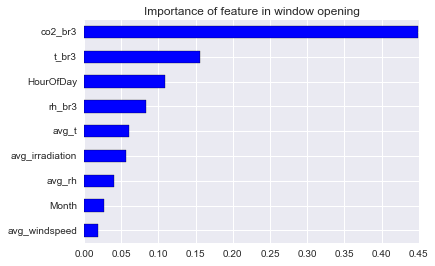

In [711]:
# This feature_importances implies how imformative certain attribute is in the classifying process
# (By calculating the error reduction with each attribute)
feature_importances_w = pd.Series(rf_w.feature_importances_,index = Behav_extracted.columns)
print feature_importances_w
feature_importances_w.sort(inplace = True)
feature_importances_w.plot(kind = 'barh',title = 'Importance of feature in window opening')